In [1]:
import matplotlib.pyplot as plt
import TrendPy.methods as tm
import TrendPy.models as tpm
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score
import pandas as pd

sns.set()


# TrendPy: Examples

###  TrendPy linReg and NumPy polyfit first order

In [2]:

x = np.array([1, 2, 3])

y = np.array([1, 1.5, 3.5])

coef = tm.linReg(x, y)

coef


[1.25, -0.5]

In [3]:
np.poly1d(coef)

poly1d([ 1.25, -0.5 ])

In [4]:
np.polyfit(x, y, 1)

array([ 1.25, -0.5 ])

In [5]:
coef

[1.25, -0.5]

In [6]:
np.poly1d(coef)(3)

3.25

In [7]:
np.poly1d(np.polyfit(x, y, 1))(3)

3.25

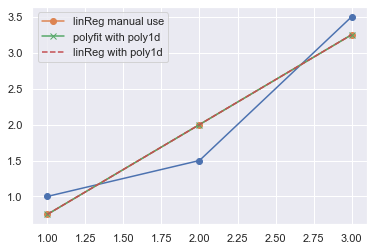

In [8]:

plt.plot(x, y, marker='o')
plt.plot(x, coef[0]*x+coef[1], label='linReg manual use', marker='o')
plt.plot(x, np.poly1d(np.polyfit(x, y, 1))(x), label='polyfit with poly1d', marker='x')
plt.plot(x, np.poly1d(coef)(x), label='linReg with poly1d', linestyle='--')
plt.legend()


## Coefficient of determination from TrendPy and scikit-learn

In [9]:

tm.r2(y, np.poly1d(coef)(x))



0.8928571428571429

In [10]:

r2_score(y, np.poly1d(coef)(x))


0.8928571428571429

## External data

In [11]:
#ls data

In [12]:
data = pd.read_csv('data/airGermany_historical.csv', sep=';', header=1, index_col='Jahr')
data

,Jahr.1,Brandenburg/Berlin,Brandenburg,Baden-Wuerttemberg,Bayern,Hessen,Mecklenburg-Vorpommern,Niedersachsen,Niedersachsen/Hamburg/Bremen,Nordrhein-Westfalen,Rheinland-Pfalz,Schleswig-Holstein,Saarland,Sachsen,Sachsen-Anhalt,Thueringen/Sachsen-Anhalt,Thueringen,Deutschland,Unnamed: 19
Jahr,,,,,,,,,,,,,,,,,,,
1881,year,7.55,7.54,7.66,6.61,7.49,6.96,7.54,7.54,8.14,7.97,7.12,8.28,6.71,7.46,7.11,6.66,7.31,NaN
1882,year,8.99,8.97,8.08,7.33,8.25,8.54,8.88,8.88,9.03,8.55,8.78,8.79,8.12,8.81,8.35,7.77,8.34,NaN
1883,year,8.42,8.41,7.77,6.85,7.96,7.95,8.39,8.39,8.71,8.26,8.18,8.51,7.46,8.32,7.87,7.31,7.88,NaN
1884,year,9.11,9.10,8.44,7.52,8.58,8.73,9.09,9.10,9.39,8.94,8.86,9.18,8.21,8.94,8.47,7.89,8.57,NaN
1885,year,8.40,8.39,7.82,7.04,7.66,7.68,7.94,7.94,8.31,8.01,7.62,8.30,7.73,8.07,7.67,7.16,7.74,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,year,10.36,10.35,9.89,9.43,9.91,9.76,10.15,10.15,10.35,10.25,9.71,10.50,9.93,10.32,9.96,9.50,9.94,NaN
2016,year,10.00,9.98,9.29,8.88,9.44,9.62,9.94,9.94,10.11,9.76,9.61,9.90,9.37,10.08,9.63,9.03,9.55,NaN
2017,year,9.92,9.91,9.40,8.83,9.56,9.47,9.97,9.97,10.31,10.01,9.57,10.21,9.39,10.03,9.63,9.10,9.58,NaN


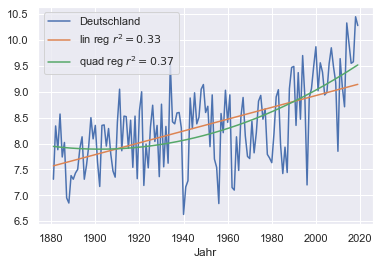

In [13]:

x_in = data['Deutschland'].index.values
y_out = data['Deutschland'].values

coef_lin = tm.linReg(x_in, y_out)

r2_lin = tm.r2(y_out, np.poly1d(coef_lin)(x_in))
r2_lin = round(r2_lin, 2)

coef_quad = tm.polReg(x_in, y_out, 2)

r2_quad = tm.r2(y_out, np.poly1d(coef_quad)(x_in))
r2_quad = round(r2_quad, 2)

data['Deutschland'].plot()
plt.plot(x_in, np.poly1d(coef_lin)(x_in), label=f'lin reg $r^2={r2_lin}$')
plt.plot(x_in, np.poly1d(coef_quad)(x_in), label=f'quad reg $r^2={r2_quad}$')

plt.legend()


### OOP

In [14]:

lin = tpm.Trend(x_in, y_out, 'linReg')

lin


In [15]:
lin.deg

In [16]:

pol = tpm.Trend(x_in, y_out, 'polReg', 3)

pol



In [17]:
pol.coef

array([ 3.70560121e-06, -2.15587164e-02,  4.18080209e+01, -2.70170268e+04])

In [18]:
pol.r2

0.428

In [19]:
pol.deg

3

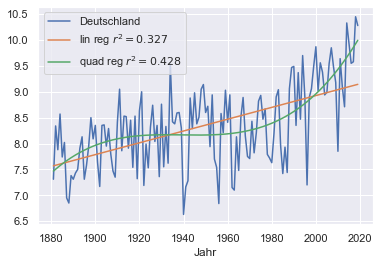

In [20]:
data['Deutschland'].plot()
plt.plot(x_in, lin.pred(x_in), label=f'lin reg $r^2={lin.r2}$')
plt.plot(x_in, pol.pred(x_in), label=f'quad reg $r^2={pol.r2}$')

plt.legend()

### SineReg

In [27]:
k = 1
f = 3
t = np.linspace(0, 1, 500)
x_org = np.sin(2*np.pi*f*t+30*np.pi/180.)
x_test = x_org + 0.3*np.random.randn(len(t))
X_test = np.fft.fft(x_test)[k]


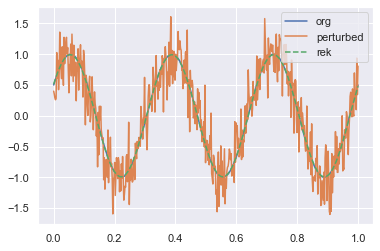

In [28]:

amplitude, frequenz, angle = tm.sineReg(t, x_test)

plt.plot(t, x_org, label='org')
plt.plot(t, x_test, label='perturbed')
plt.plot(t, amplitude*np.cos(2*np.pi*frequenz*t+angle), linestyle='--', label='rek')
plt.legend()


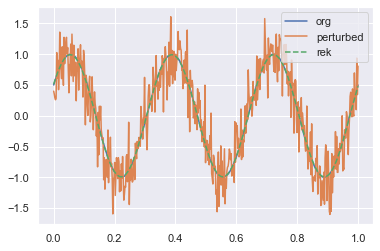

In [30]:

sine = tpm.Trend(t, x_test, 'sineReg')

plt.plot(t, x_org, label='org')
plt.plot(t, x_test, label='perturbed')
plt.plot(t, sine.pred(t), linestyle='--', label='rek')
plt.legend()
